<h3>Nom : SAADI<br>
Prenom : Brahim<br>
2 DSIA</h3>

<h1 style="color:red">TP N°2 : Opérations ponctuelles et transformations géométriques</h1>

<h2>Table of Contents :<br><br>
&emsp;&emsp;<a href="#manip1">manipulation 01</a><br><br>
&emsp;&emsp;<a href="#manip2">manipulation 02</a><br><br>
&emsp;&emsp;<a href="#manip3">manipulation 03</a><br></h2>

In [1]:
# importing libraries

import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt
import os
import cmath
import random

<a id="manip1"></a>
<h2 style='color:red'> Manipulation 01:</h2>

<h3 style='color:red'>qst 01</h3>

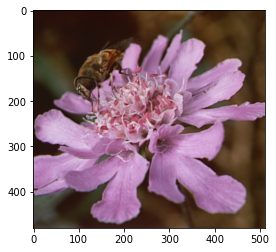

In [2]:
img_orig = cv.imread("images/flower.bmp")
cv.imshow("flower", img_orig)
cv.waitKey(0)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

plt.imshow(img_orig)
plt.show()

<h3 style='color:red'>Qst 02: convertire l'image en niveaux de gris</h3>

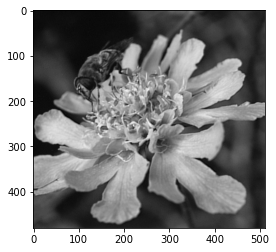

In [3]:
img_gris = cv.cvtColor(img_orig, cv.COLOR_RGB2GRAY)

# cv.imshow("jfj", img_gris)
# cv.waitKey(0)

plt.imshow(img_gris, cmap='gray')
plt.show()

<h3 style='color:red'>Qst 03: Histogramme et Histogramme normalise</h3>

In [4]:
img_gris.shape

(480, 512)

In [5]:
histogramme,bins = np.histogram(img_gris.ravel(),256,[0,255])
histogramme_normalise = histogramme/(480*512)

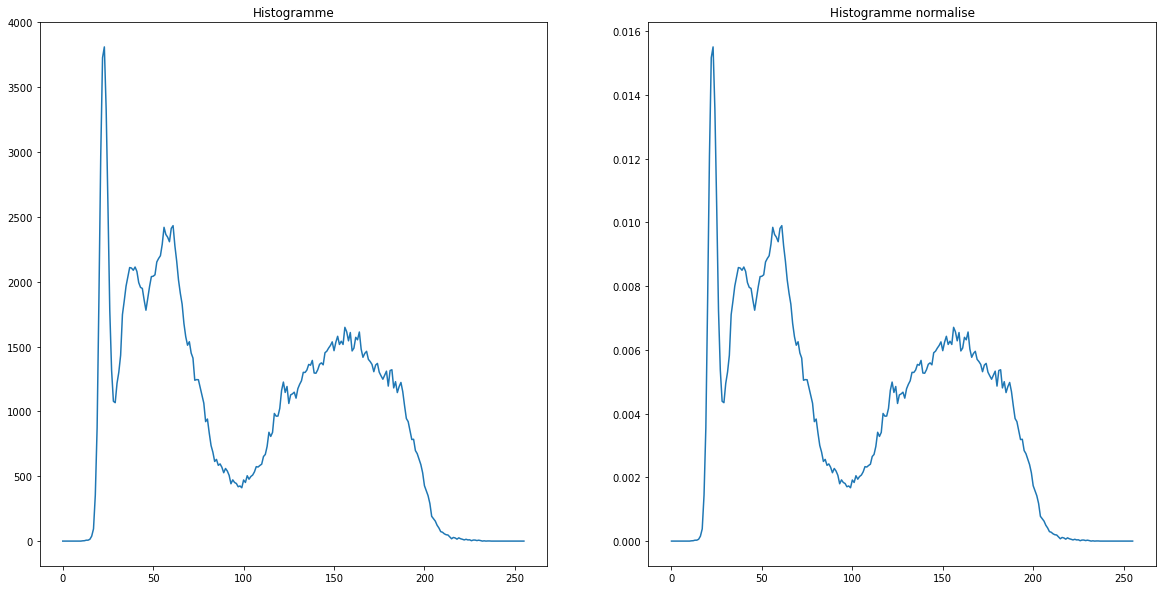

In [6]:
# figure2, (ax1, ax2) = plt.subplots(1, 2)

fig=plt.figure(figsize=(20, 10)) 

fig.add_subplot(1,2,1)
plt.plot(histogramme)
plt.title("Histogramme")

fig.add_subplot(1,2,2)
plt.plot(histogramme_normalise)
plt.title("Histogramme normalise")

plt.show()

<h3>commentaire :</h3><br>
<b>l'histogramme de l'image gris est centré a gauche donc l'image est grisé manque de contraste.</b>

<h3 style='color:red'>Qst 04: calcule de l'histogramme cumulé.</h3>

Text(0.5, 1.0, "l'histogramme cumulé")

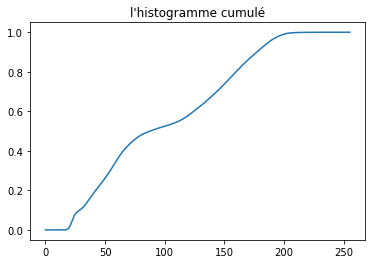

In [7]:
hist_cum = np.zeros(256)
for i in range(1,256):
    hist_cum[i] = hist_cum[i-1] + histogramme_normalise[i]
    
plt.plot(hist_cum)
plt.title("l'histogramme cumulé")

<h3>commentaire</h3>

<b>l'histogramme atteint la valeur 1 dans les environs de niveau de gris 200 ce qui implique la faible présence des niveaux de gris supérieur à 200 donc l'image est un peu grise => manque de contraste.</b>

<h3 style='color:red' id="manip1">Qst 05: égalisation d’histogramme.</h3>

In [8]:
# fonction pour l'ecalisation de l'istogramme avec possibilite de choisir l'ishtogramme de depart

def egalisation(hist, img):
    shape = img.shape
    hist_cum = np.zeros(256)
    vg = np.zeros(256)
    a = np.zeros([shape[0],shape[1]])
    
    hist_nor = hist/(shape[0]*shape[1])
    for i in range(1,256):
        hist_cum[i] = hist_cum[i-1] + hist_nor[i]
    
    for i in range(256):
        vg[i] = round(255*hist_cum[i])

    for i in range(shape[0]):
        for j in range(shape[1]):
            a[i,j] = vg[img[i,j]]
            
    a = a.astype("int32")
      
    return a

<!--  -->

<!--  -->

In [9]:
image_ega = egalisation(histogramme, img_gris)
histo_ega ,bins = np.histogram(image_ega.ravel(),256,[0,255])


<h3 style='color:red' id="manip1">Qst 06: égalisation d’histogramme on utilisant opencv</h3>

In [10]:
equ = cv.equalizeHist(img_gris)
hist_equ,bins = np.histogram(equ.ravel(),256,[0,255])

<h3>comparaison entre resultat de la fonction egalisation et la fonction de openCV </h3>

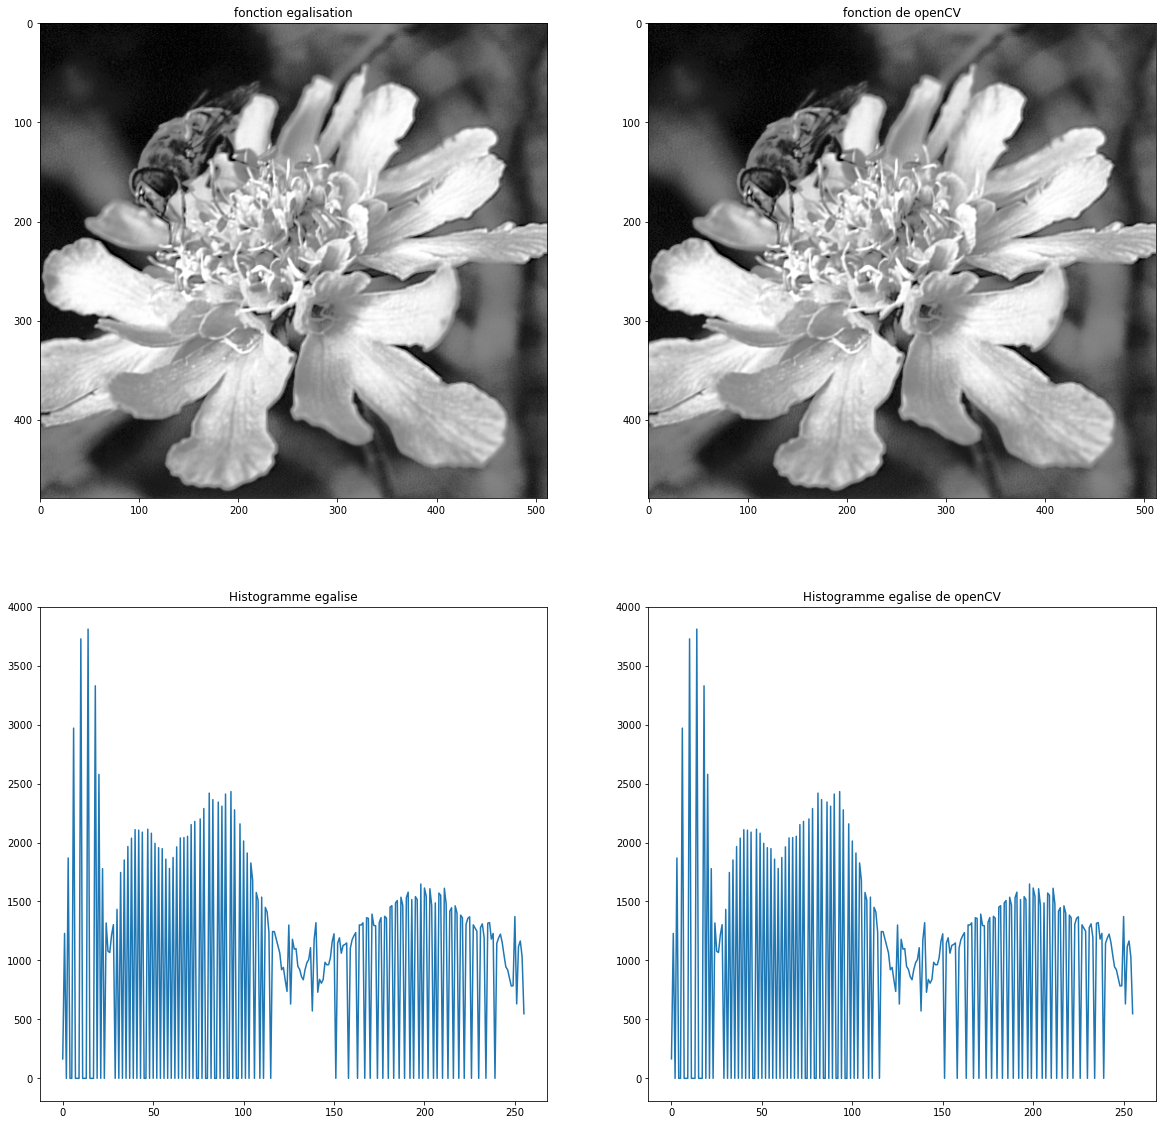

In [14]:
fig=plt.figure(figsize=(20, 20)) 

fig.add_subplot(2,2,1)
plt.imshow(image_ega, cmap="gray")
plt.title("fonction egalisation")

fig.add_subplot(2,2,3)
plt.plot(histo_ega)
plt.title("Histogramme egalise")

fig.add_subplot(2,2,2)
plt.imshow(equ, cmap="gray")
plt.title("fonction de openCV")

fig.add_subplot(2,2,4)
plt.plot(hist_equ)
plt.title("Histogramme egalise de openCV")


plt.show()

<h3>commentaire</h3>

<b>on peut conclure que la fonction de openCV utilise le meme consepte vue dans le coure pour l'egalisation d'histogramme.</b>

<h3 style='color:red' id="manip1">Qst 07: egalisation des 3 plans RGB</h3> 

In [17]:
R, G, B = cv.split(img_orig)

hist_R,bins = np.histogram(R.ravel(),256,[0,255])
hist_G,bins = np.histogram(G.ravel(),256,[0,255])
hist_B,bins = np.histogram(B.ravel(),256,[0,255])

In [18]:
# egalisation de chaque canal(R,G et B)

R_ega = cv.equalizeHist(R)
G_ega = cv.equalizeHist(G)
B_ega = cv.equalizeHist(B)

In [19]:
# les histograme des canaux R, G, et B

hist_R_ega, bins = np.histogram(R_ega.ravel(),256,[0,255])
hist_G_ega, bins = np.histogram(G_ega.ravel(),256,[0,255])
hist_B_ega, bins = np.histogram(B_ega.ravel(),256,[0,255])

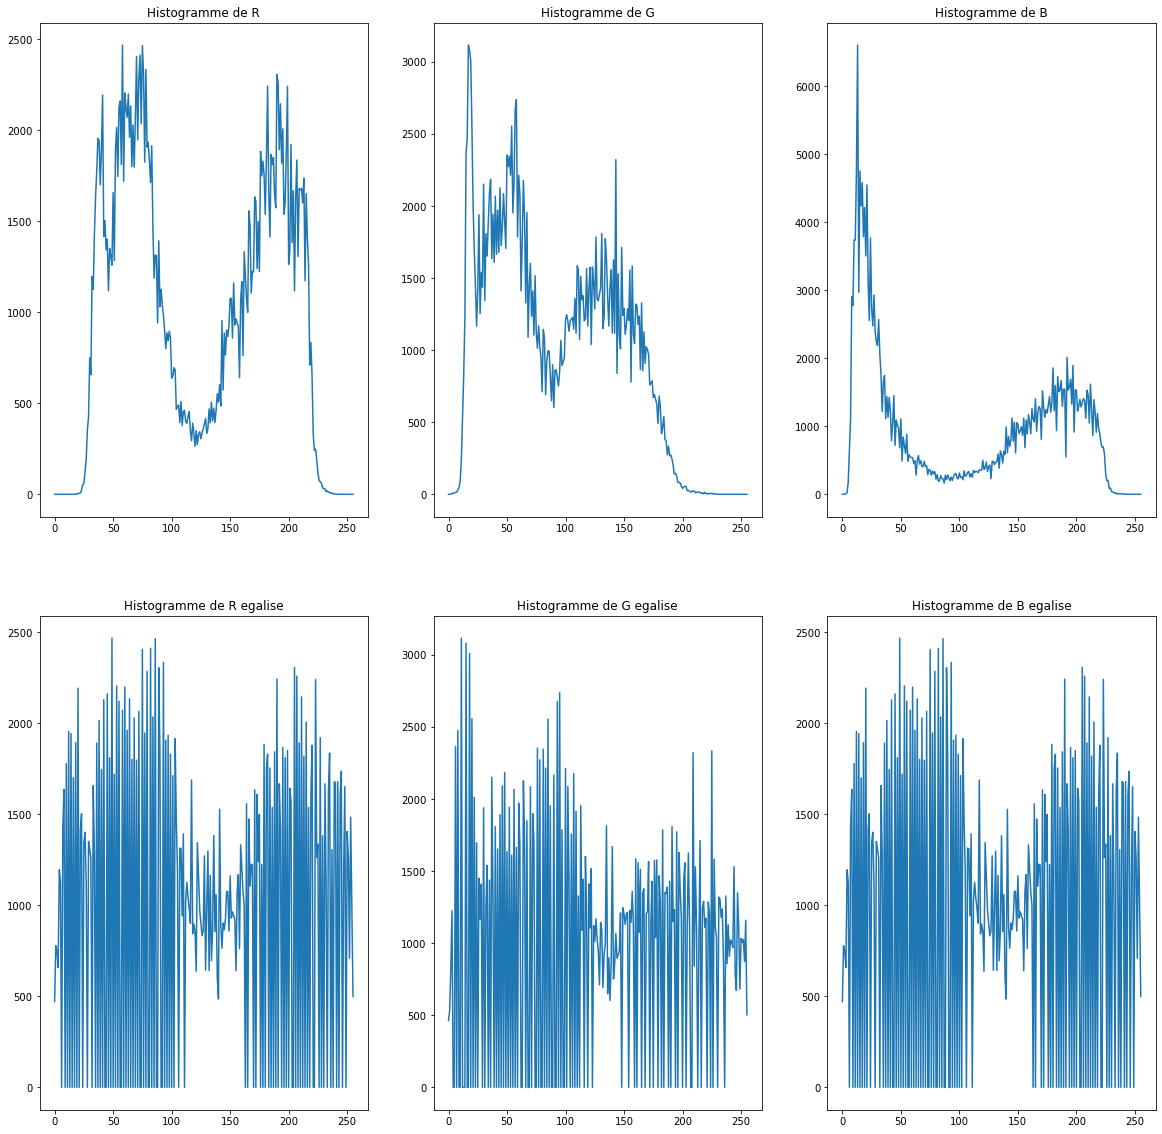

In [20]:
fig=plt.figure(figsize=(20, 20)) 

fig.add_subplot(2,3,1)
plt.plot(hist_R)
plt.title("Histogramme de R")

fig.add_subplot(2,3,4)
plt.plot(hist_R_ega)
plt.title("Histogramme de R egalise")

fig.add_subplot(2,3,2)
plt.plot(hist_G)
plt.title("Histogramme de G")

fig.add_subplot(2,3,5)
plt.plot(hist_G_ega)
plt.title("Histogramme de G egalise")

fig.add_subplot(2,3,3)
plt.plot(hist_B)
plt.title("Histogramme de B")

fig.add_subplot(2,3,6)
plt.plot(hist_R_ega)
plt.title("Histogramme de B egalise")



plt.show()

<!--  -->

<!--  -->

<h3>visualisation de l'image resultante</h3>

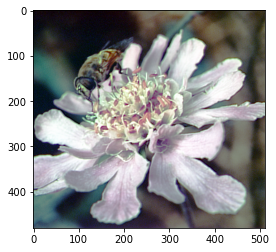

In [21]:
image_equ = cv.merge((R_ega, G_ega, B_ega))
plt.imshow(image_equ)
plt.show()
# cv.cvtColor(image_equ, cv.COLOR_BGR2RGB))


<h4>calcule de l'entropie</h4>

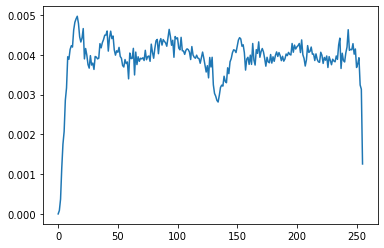

In [29]:
# calcule histogramme de l'image

img_gris_ega = cv.cvtColor(image_equ, cv.COLOR_BGR2GRAY)
hist_img_ega,bins = np.histogram(img_gris_ega.ravel(),256,[0,255])

hist_img_ega_normalise = hist_img_ega/(480*512)

plt.plot(hist_img_ega_normalise)
plt.show()

In [23]:
# fonction pour le calcule de l'entropi

def entropie(img):
    s = 0
    hist,bins = np.histogram(img.ravel(),256,[0,255])
    hist_norm = hist/(img.shape[0]*img.shape[1])
    
    for i in range(256):
        s = s -hist_norm[i]*np.log2(hist_norm[i])
        
    return s

In [26]:
print(f"l'entropie de l'image apres egalisation de chaque plan separement = {entropie(img_gris_ega)}")

l'entropie de l'image apres egalisation de chaque plan separement = 7.974315891816557


<!--  -->

<h3 style='color:red' id="manip1">Qst 08:</h3>

Egaliser les 3 composantes couleurs par rapport à l’histogramme cumulé de la<br> question 4 et visualiser l’image correspondante. Calculer son entropie.

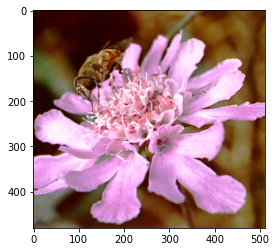

In [27]:
R_ega_8 = egalisation(histogramme, R)
G_ega_8 = egalisation(histogramme, G)
B_ega_8 = egalisation(histogramme, B)

image_ega_avec_gris_hist = np.uint8(cv.merge((R_ega_8, G_ega_8, B_ega_8)))

plt.imshow(image_ega_avec_gris_hist)
plt.show()

<h3>calcule de l'entropie du nouvelle image</h3>

In [28]:
img_gris_ega = cv.cvtColor(image_ega_avec_gris_hist, cv.COLOR_BGR2GRAY)

print(f"l'entropie de l'image apres egalisation de chaque plan separement = {entropie(img_gris_ega)}")

l'entropie de l'image apres egalisation de chaque plan separement = 7.8356926923970756


In [30]:
histogramme_image_ega_avec_gris_hist,bins = np.histogram(image_ega_avec_gris_hist.ravel(),256,[0,255])
histogramme_image_ega_avec_gris_hist = histogramme_image_ega_avec_gris_hist/(480*512)

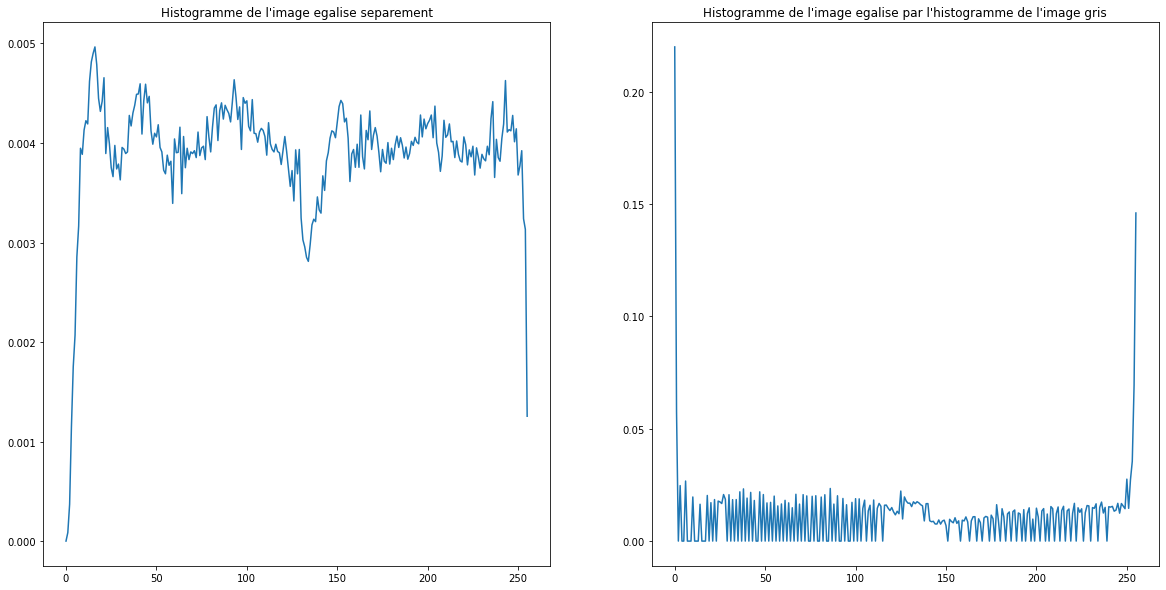

In [34]:
fig=plt.figure(figsize=(20, 10)) 

fig.add_subplot(1,2,1)
plt.plot(hist_img_ega_normalise)
plt.title("Histogramme de l'image egalise separement")

fig.add_subplot(1,2,2)
plt.plot(histogramme_image_ega_avec_gris_hist)
plt.title("Histogramme de l'image egalise par l'histogramme de l'image gris")

plt.show()

<h3 style='color:red' id="manip1">Qst 09:</h3>

comparaison des historammes et des entropies

In [ ]:
# visualisation des histogrammes

hist,bins = np.histogram(img.ravel(),256,[0,255])

<h3 style='color:red' id="manip1">Qst 10:</h3>

10- Lire et visualiser l’image ‘pentagon.tif’, égaliser son histogramme. Commenter.

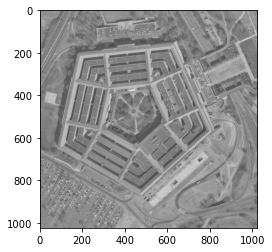

In [35]:
pentagon = cv.imread("images/pentagon.tif")
plt.imshow(pentagon, cmap="gray")
plt.show()

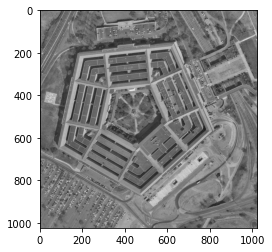

In [36]:
pentagon = cv.cvtColor(pentagon, cv.COLOR_BGR2GRAY)
plt.imshow(pentagon,cmap="gray")
plt.show()

In [37]:
# histogramme

histogramme_pentagon, bins = np.histogram(pentagon.ravel(),256,[0,255])
pentagon_ega = egalisation(histogramme_pentagon, pentagon)
histogramme_pentagon_ega, bins = np.histogram(pentagon_ega.ravel(),256,[0,255])


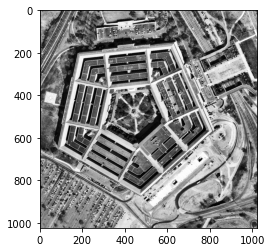

In [38]:
plt.imshow(pentagon_ega, cmap="gray")

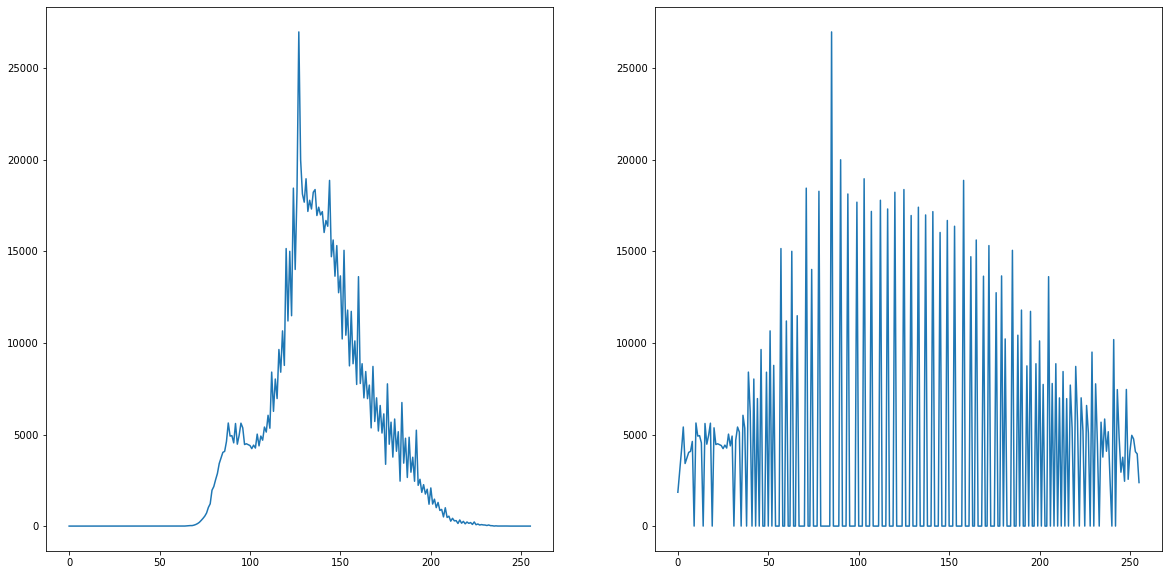

In [39]:
fig=plt.figure(figsize=(20, 10)) 

fig.add_subplot(1,2,1)
plt.plot(histogramme_pentagon)

fig.add_subplot(1,2,2)
plt.plot(histogramme_pentagon_ega)

plt.show()

<h3>commentaire</h3>

<b>le contraste de l'image augmente après l'égalisation les contours de l'image seront plus visibles.</b>

<h3 style='color:red' id="manip1">Qst 11:</h3>

Réaliser une amélioration de contraste de l’image ‘cameraman.jpg’ à l’aide de l’histogramme matching de l’image ‘barbara.png’

In [40]:
from skimage import exposure 
from skimage.exposure import match_histograms

In [41]:
cameraman = cv.imread("images/cameraman.jpg")
barbara = cv.imread("images/barbara.png")

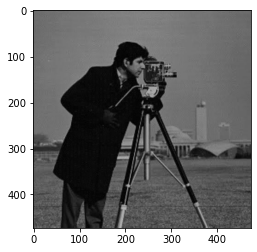

In [42]:
plt.imshow(cameraman)

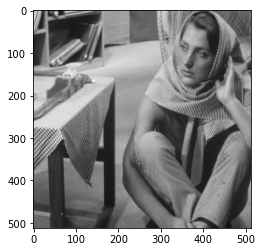

In [43]:
plt.imshow(barbara)

In [44]:
matched = match_histograms(cameraman, barbara)
matched = matched.astype(int)

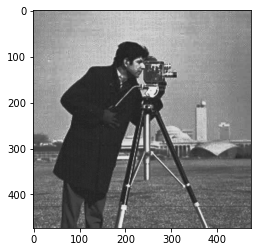

In [45]:
plt.imshow(matched)

<!--  -->

<a id="manip2"></a>
<h1 style='color:red'>Manipulation 02:</h1>

### creation des images

In [47]:
image_A = np.zeros([256,256])

for i in range(256):
    for j in range(256):
        if i>=90 and i<=120 and j >=90 and j<=180:
            image_A[i,j] = 0
        else:
            image_A[i,j] = 255    
            
image_B = np.zeros([256,256])

for i in range(256):
    for j in range(256):
        if i>=110 and i<=150 and j >=110 and j<=150:
            image_B[i,j] = 0
        else:
            image_B[i,j] = 255
            
            

image_A = np.uint8(image_A)
image_B = np.uint8(image_B)


Text(0.5, 1.0, 'iamge_B')

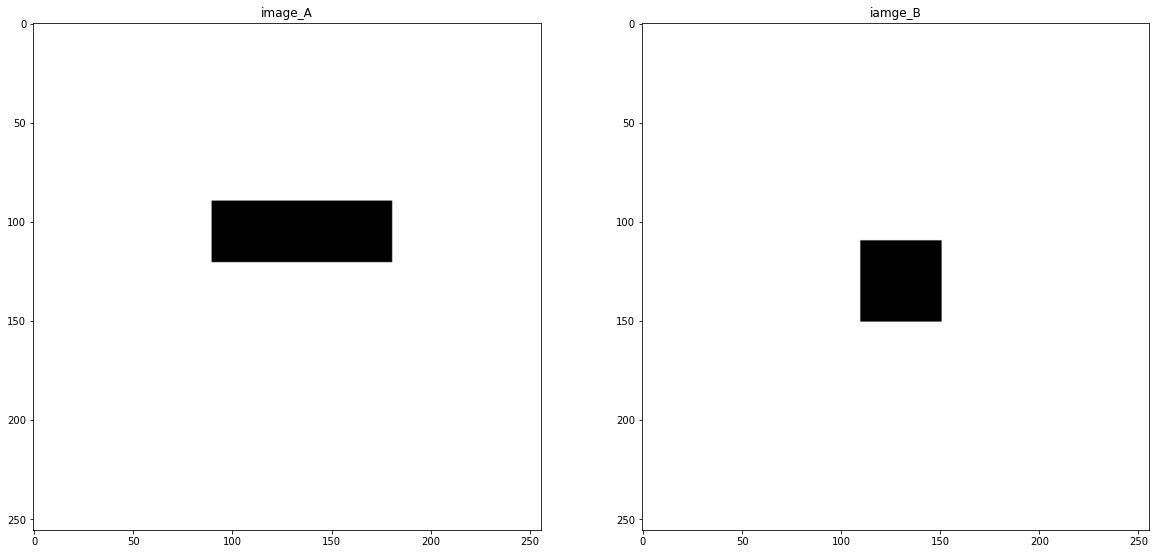

In [48]:
fig=plt.figure(figsize=(20, 20)) 

fig.add_subplot(1,2,1)
plt.imshow(image_A, cmap='gray')
plt.title("image_A")

fig.add_subplot(1,2,2)
plt.imshow(image_B, cmap='gray')
plt.title("iamge_B")

<h3 style='color:red'>Qst 01:</h3>

#### les opérations logiques NOT, AND, OR et XOR sur les image A et B:

### not operation

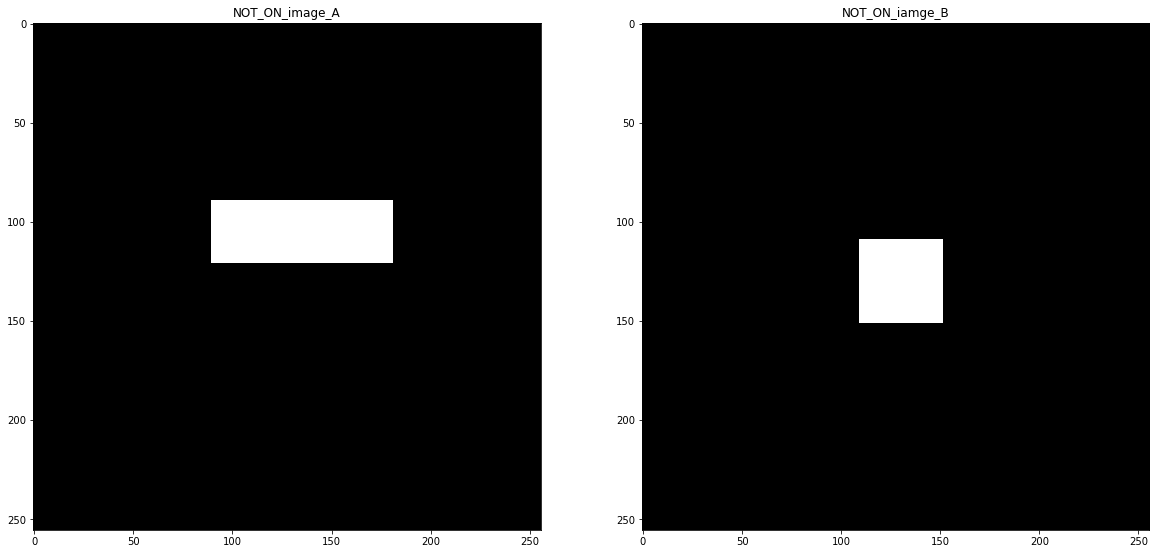

In [56]:
NOT_image_A = cv.bitwise_not(image_A)
NOT_image_B = cv.bitwise_not(image_B)

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1)
plt.imshow(NOT_image_A, cmap='gray')
plt.title("NOT_ON_image_A")

fig.add_subplot(1,2,2)
plt.imshow(NOT_image_B, cmap='gray')
plt.title("NOT_ON_iamge_B")

plt.show()

### AND, OR, XOR operations

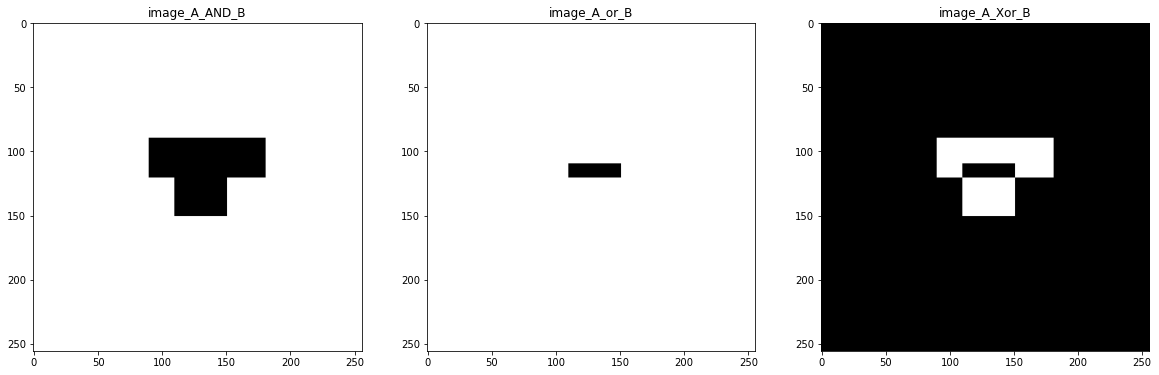

In [58]:
image_A_AND_B = cv.bitwise_and(image_A, image_B)
image_A_OR_B = cv.bitwise_or(image_A, image_B)
image_A_XOR_B = cv.bitwise_xor(image_A, image_B)

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,3,1)
plt.imshow(image_A_AND_B, cmap='gray')
plt.title("image_A_AND_B")

fig.add_subplot(1,3,2)
plt.imshow(image_A_OR_B, cmap='gray')
plt.title("image_A_or_B")

fig.add_subplot(1,3,3)
plt.imshow(image_A_XOR_B, cmap='gray')
plt.title("image_A_Xor_B")
plt.show()

<h3> Analyse et interprétation<h3>

<b>On remarque que les opérations sont inversées par exemple dans AND: `le blanc` + `le blanc` = `noir` {normalement `blanc` !!!!!}<br>
le resultat de l'operation AND est enverse avec l'operation OR</b>

<h3 style='color:red'>Qst 02:</h3>

#### generation des images : Ai=not A et Bi=Not B

In [51]:
Ai = cv.bitwise_not(image_A)
Bi = cv.bitwise_not(image_B)

#### les operations sur Ai et Bi

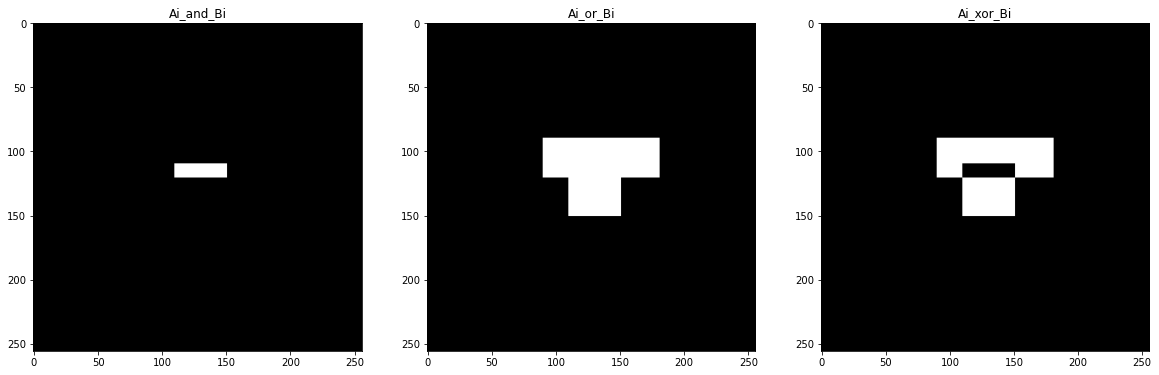

In [52]:
Ai_and_Bi = cv.bitwise_and(Ai, Bi)
Ai_or_Bi = cv.bitwise_or(Ai, Bi)
Ai_xor_Bi = cv.bitwise_xor(Ai,Bi)

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,3,1)
plt.imshow(Ai_and_Bi, cmap='gray')
plt.title("Ai_and_Bi")

fig.add_subplot(1,3,2)
plt.imshow(Ai_or_Bi, cmap='gray')
plt.title("Ai_or_Bi")

fig.add_subplot(1,3,3)
plt.imshow(Ai_xor_Bi, cmap='gray')
plt.title("Ai_xor_Bi")

plt.show()

<h3>commentaire</h3>

<b>ces résultats sont les plus logiques et les plus adaptent aux définitions de chaque opération.</b>

<h3 style='color:red'>Qst 03:</h3>

scaling the data

In [61]:
image_A = image_A/255
image_B = image_B/255

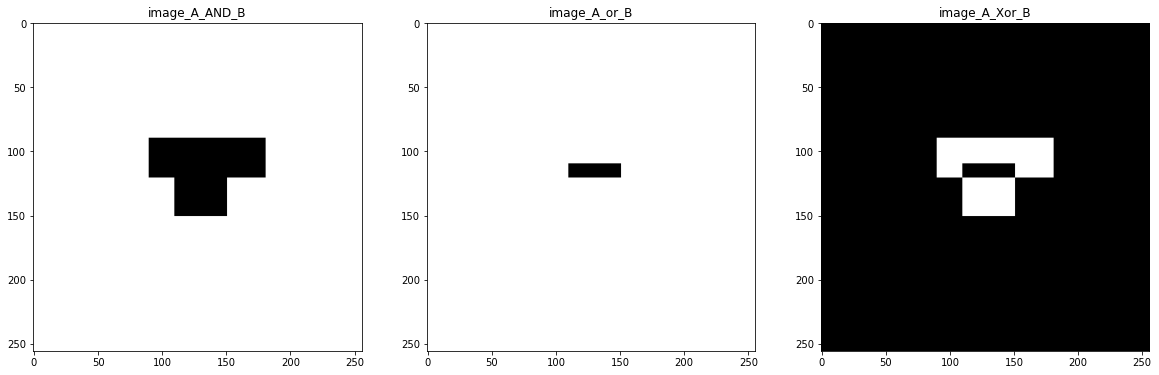

In [62]:
image_A_AND_B = cv.bitwise_and(image_A, image_B)
image_A_OR_B = cv.bitwise_or(image_A, image_B)
image_A_XOR_B = cv.bitwise_xor(image_A, image_B)

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,3,1)
plt.imshow(image_A_AND_B, cmap='gray')
plt.title("image_A_AND_B")

fig.add_subplot(1,3,2)
plt.imshow(image_A_OR_B, cmap='gray')
plt.title("image_A_or_B")

fig.add_subplot(1,3,3)
plt.imshow(image_A_XOR_B, cmap='gray')
plt.title("image_A_Xor_B")
plt.show()

<a id="manip3"></a>
<h1 style='color:red'>Manipulation 03:</h1>


<h3 style='color:red'>Qst 01:</h3>

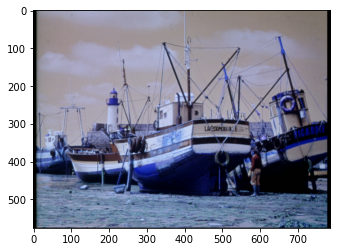

In [63]:
BoatsColor = cv.imread("images/BoatsColor.bmp")
plt.imshow(BoatsColor)
plt.show()

<h3 style='color:red'>Qst 02:</h3>

<h3>a:</h3> Translater l’image de 35 pixels vers le bas et 10 pixels vers la droite

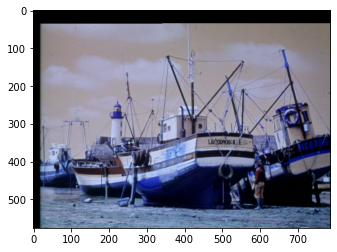

In [64]:
rows,cols = BoatsColor.shape[0:2]

M = np.float32([[1,0,10],[0,1,35]])
dst = cv.warpAffine(BoatsColor,M,(cols,rows))

plt.imshow(dst)
plt.show()

<h3>b: </h3> Redimensionner la taille de l’image en divisant sa largueur par un facteur de 2 et
sa hauteur par un facteur de 1,5

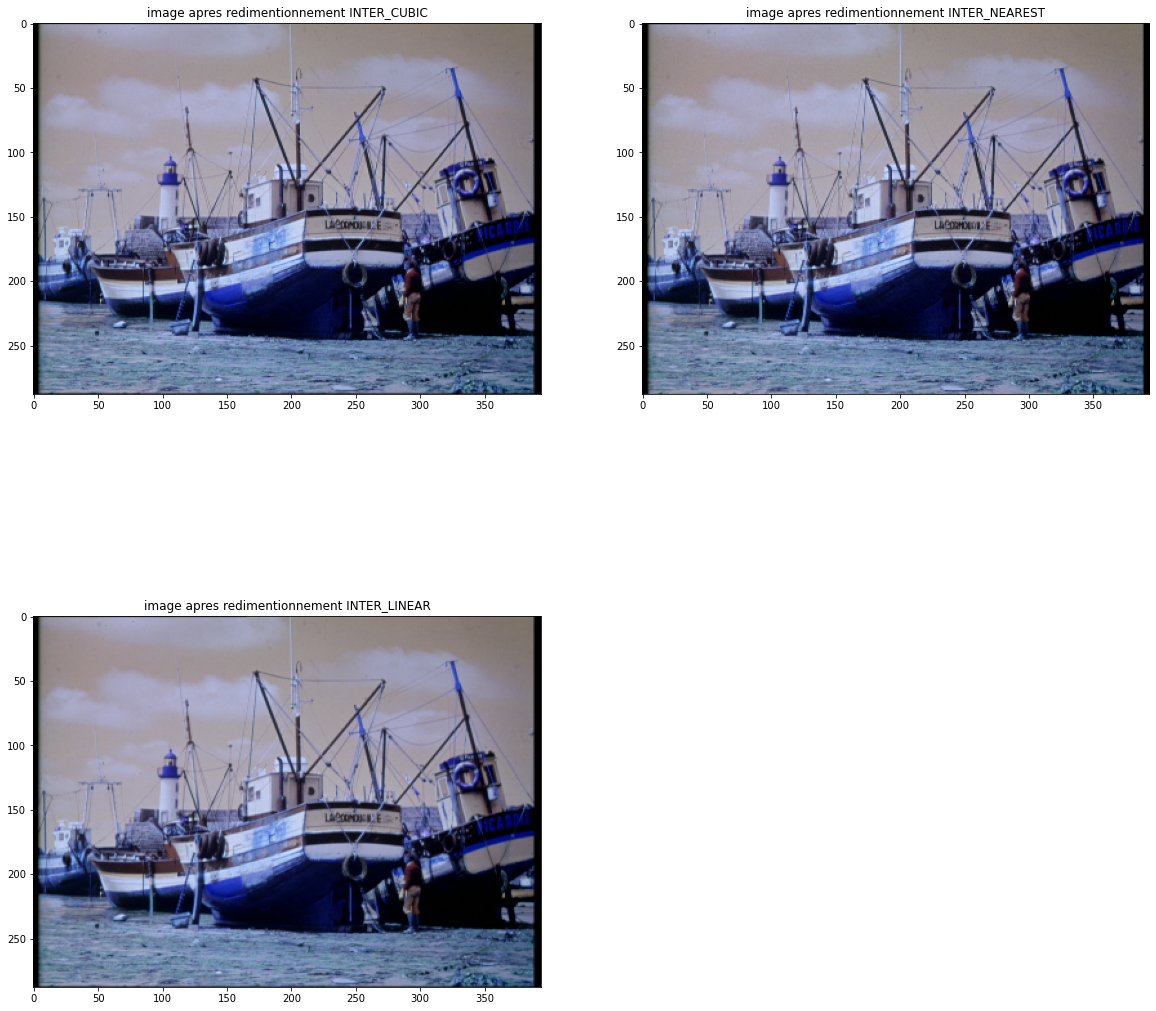

In [65]:
res_INTER_CUBIC = cv.resize(BoatsColor,None,fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
res_INTER_NEAREST = cv.resize(BoatsColor,None,fx=0.5, fy=0.5, interpolation = cv.INTER_NEAREST)
res_INTER_LINEAR = cv.resize(BoatsColor,None,fx=0.5, fy=0.5, interpolation = cv.INTER_LINEAR)

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(2,2,1)
plt.imshow(res_INTER_CUBIC)
plt.title("image apres redimentionnement INTER_CUBIC")

fig.add_subplot(2,2,2)
plt.imshow(res_INTER_NEAREST)
plt.title("image apres redimentionnement INTER_NEAREST")

fig.add_subplot(2,2,3)
plt.imshow(res_INTER_LINEAR)
plt.title("image apres redimentionnement INTER_LINEAR")
plt.show()

<h3>c:</h3>Pivoter l’image d’un angle de 60°

In [67]:
rows,cols = BoatsColor.shape[0:2]

M = cv.getRotationMatrix2D((cols/2,rows/2),60,1)
dst = cv.warpAffine(BoatsColor,M,(cols,rows))

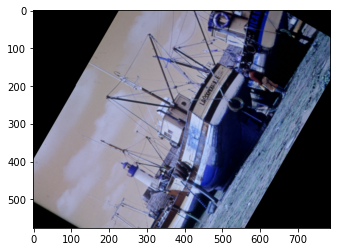

In [68]:
plt.imshow(dst)

## display images with matplotlib in the real size

In [ ]:
def display_image_in_actual_size(im_data):

    dpi = 80
#     im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_in_actual_size(dst)